# **사전준비 for colab**
matplotlib 그래프 내 한글 글꼴 표시를 위한 설치 및 런타임 다시 시작과 폰트 설정 작업을 단계별로 수행한다.

## [1] 폰트 설치 (나눔글꼴) 및 폰트매니저 재구성

In [ ]:
####  없어도 됨 [폰트개수 확인용]
# 시스템내 최초 설치된 폰트개수 확인 - 처음에는 기본 폰트만 설치됨

import matplotlib.font_manager as fm  # 폰트 관련 용도
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

In [ ]:
# 나눔고디 폰트 설치

!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
####  없어도 됨 [폰트개수 확인용]
# 설치 후  폰트 개수 확인,  늘어 난 것을 알 수 있다.

import matplotlib.font_manager as fm  # 폰트 관련 용도
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

In [ ]:
# 폰트 매니저 재설정을 위한 명령문 수행 : fm._rebuild()
import matplotlib.font_manager as fm
fm._rebuild()

## [2] 폰트 인식을 위한  '런타임 다시시작'
  - '런타임' - '런타임 다시 시작' 
  - 또는 'Ctrl-M'

## [3] 런타임 재시작 이후 
   - 폰트  설정 및 마이너스 부호 오류 처리
   - **시작 이후에는 본 셀 이후 부터 실행한다.**

In [ ]:
# 관련 라이브러리 임포트
import matplotlib.font_manager as fm  # 폰트 관련 
import matplotlib.pyplot as plt   # 그래프 내 설정
import matplotlib as mpl  # 기본 설정 

In [ ]:
####  없어도 됨 [폰트개수 확인용]
# 런타임 다시 시작 이후, 설치 된 폰트 개수가 증가 한 상태임을 알 수 있다. 
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

In [ ]:
# 폰트의 경로를 통해 사용할 폰트 (나눔고딕)를 지정한다.
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 나눔글꼴중 사용할 폰트의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
# 마이너스 부호 처리에 오류가 있는 경우를 방지 하기 위한 설정
mpl.rcParams['axes.unicode_minus'] = False

# **분석 주요 라이브러리 임포트**

In [ ]:
import ****

# **3. 온라인 판매 데이터 분석**

## **3.1 문제정의**
코로나로 인해서 온라인 판매가 증가 하였다고 한다. <br>
     1.시기별: 코로나 이전과 이후 시기를 비교하여 온라인 판매가 증가하였는가?<br>
     2.판매 매체별: 인터넷 쇼핑과 모바일 쇼핑 중 어떤 매체의 판매량이 더 증가하였는가?<br>
     3.상품군별: 모든 상품의 판매가 증가한 것일까? (배달음식은 늘어났을 것 같은데, 콘서트 티켓은 줄었을 것 같다.)




## **3.2 데이터 수집**
KOSIS 국가 통계 포털에서 '온라인쇼핑몰 판매매체별/상품군별거래액' 에서 데이터를 다운로드 받는다. 
* KOSIS는 데이터를 다운로드 받기 전에 형태를 수정 할 수 있다.  이를 활용하여 정돈된 데이터 형태로 변환 하여 다운로드 받는다. 


1.   불필요한 상품군별 **합계** /판매매체별 **계** 항목 제외
2.   행렬 전환으로 컬럼 방향으로 펼쳐진 시간축을 행(인덱스 방향으로 변경)
3.   데이터 수집 기간을 변경 (2017.1~2021.2)
4.   엑셀에서 시점에 붙어 있는 '2021.02 p)' 의 'p)'의 처리
   - 홈 - 찾기 및 선택 - 바꾸기 (또는 Ctrl - H) 
   - 찾을 내용:  p),  바꿀 내용 : *(공백)*  --> 모두 바꾸기 수행


https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10051&conn_path=I2

![온라인판매엑셀](https://github.com/sagelab4data/images/blob/main/online_excel.png?raw=true)

In [ ]:
# 3.2.1 KOSIS에서 정돈한 형태의 데이터를 읽어 들인다. 
online = pd.read_excel('https://github.com/sagelab4data/first_da_2021_1/blob/main/Day04_Online_Channel_Product_Sales.xlsx?raw=true')
online.tail(10)

## **3.3 데이터 가공**


**online 판매 데이터 항목 분석**
- 판매연월 : 50개월
    * 2017년 1월~ 2021년 2월  

  - 판매 매체별 : 2개 채널
    *   '모바일쇼핑', '인터넷쇼핑'
  - 상품군별 : 23개 상품군
    *  'e쿠폰서비스', '가구', '가방', '가전·전자·통신기기', '기타', '기타서비스',<br>
       '농축수산물','문화 및 레저서비스', '사무·문구', '생활용품', '서적',<br> 
       '스포츠·레저용품', '신발', '아동·유아용품','애완용품', '여행 및 교통서비스', <br>
       '음·식료품', '음식서비스', '의복', '자동차 및 자동차용품',<br>
       '컴퓨터 및 주변기기', '패션용품 및 액세서리', '화장품'<br>
  


In [ ]:
# 3.3.1  online 데이터 형태의 확인
****

In [ ]:
# 3.3.2 online  데이터의 자료형 확인
****

In [ ]:
# 3.3.3 시점 데이터(object)를 날짜형(datetime64)으로 변경
****
online.info()

In [ ]:
# 3.3.4 정돈된 데이터
online.head(52)

## **3.4 데이터 모델링 (분석) 및 시각화**



1.   시점별 판매량 분석 및 시각화 ( online_by_time)
2.   상품군별 시점별 판매량 분석 및 시각화 (online_by_time_prod)
3.   매체별 시점별 판매량 분석 및 시각화 (online_by_time_channel)
4.   상품군별 매체별 시점별 판매량 분석 및 시각화 (online_by_time_prod_channel)
5.   상품군 별 매체분포 시각화


![온라인판매분석](https://github.com/sagelab4data/images/blob/main/HD02_day04_online_pivot.png?raw=true)

### 3.4.1 시점별 판매량 분석



![온라인판매분석_1](https://github.com/sagelab4data/images/blob/main/HD02_day04_online_pivot1.png?raw=true)

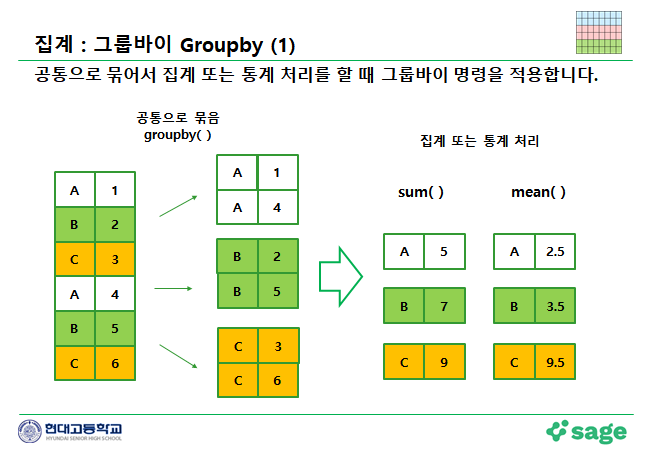

In [ ]:
# 3.4.1.1 '시점' 별로 '데이터'를 합산한다. 

online_by_time = ****


In [ ]:
# 3.4.1.2 데이터 건수 확인 (2017.01~2021.02 : 12*4 + 1 = 50 행)
online_by_time.****

In [ ]:
# 3.4.1.3 데이터 자료형 확인
online_by_time.****

In [ ]:
online_by_time

### 3.4.1.1 시점별 판매량 시각화 (online_by_time)

In [ ]:
# 3.4.1.1 온라인 판매량 합계 추이를 꺾은선 그래프로 나타내고 관찰한다. 

online_by_time.****(figsize=(12, 4))

In [ ]:
# 3.4.1.2 온라인 판매량 합계 추이에 연도별 세로 선을 그어 주기를 관찰해보자.
online_by_time.plot(kind = 'line', figsize = (12,4));

# 연도를 표현하는 세로선의 위치 지정
x18 = np.datetime64('2018-01-01') 
x19 = np.datetime64('2019-01-01')
x20 = np.datetime64('2020-01-01')
x21 = np.datetime64('2021-01-01')

# 세로선의 하단과 상단 지정 (최소 최대값)
ymin = online_by_time.min()
ymax = online_by_time.max()

# 4 개의 세로선 긋기
plt.vlines(x = [x18, x19, x20, x21], ymin = ymin, ymax= ymax, color = 'gray', linestyle = '--');

* 증가 추세가 관찰 되기는 하나, 2017~2019년 대비 급격하게 증가하는 느낌을 받지는 못한다. 

## 3.4.2 매체별 시점별 판매량 분석



![온라인판매분석_3](https://github.com/sagelab4data/images/blob/main/HD02_day04_online_pivot2.png?raw=true)

In [ ]:
# 3.4.2.1 판매매체별 시점별로 피봇 테이블을 구성

online_by_time_channel = online.pivot_table(index = '****', 
                                            columns = '****', 
                                            values = '****', 
                                            aggfunc = '****')
online_by_time_channel.tail()

In [ ]:
# 3.4.2.2 데이터 건수 확인 ( 45행 x 2열 (판매매체 개수))
online_by_time_channel.****

In [ ]:
# 3.4.2.3 데이터 자료형 확인
online_by_time_channel.****

### 3.4.2.1 매체별 시점별 판매량 시각화 (online_by_time_channel)

In [ ]:
# 3.4.2.1 판매매체별 온라인 판매량 합계 추이에 연도별 세로 선을 그어 주기를 관찰해보자.

# 판매매체별 색상
channel_colors = [ 'red', 'blue']

online_by_time_channel.****(kind = 'line', figsize = (12,4), color = channel_colors);

# 세로선의 하단과 상단 지정 (최소 최대값)
ymin = online_by_time_channel.min().min()
ymax = online_by_time_channel.max().max()

# 3 개의 가로선 긋기
plt.vlines(x = [x18, x19, x20, x21], ymin = ymin, ymax= ymax, color = 'gray', linestyle = '--');

* 모바일 쇼핑과 인터넷 쇼핑이 주기 (등락:오르고 내리고) 관점에서 비슷하게 나타나지만, 모바일 쇼핑이 보다 빠르게 성장하고 있는 것으로 보인다. 

### 3.4.3 상품군별 시점별 판매량 분석



![온라인판매분석_2](https://github.com/sagelab4data/images/blob/main/HD02_day04_online_pivot3.png?raw=true)

#### [] 피봇테이블 : 데이터 집계 수행


```
데이터프레임. pivot_table(index = ‘행으로 만들 컬럼’, 
                         columns = ＇열방향으로 만들 컬럼’,
                         values= ＇집계할 값’ 컬럼,
                         aggfunc = ‘집계함수’)
```



![피봇테이블](https://github.com/sagelab4data/images/blob/main/pivot_table.png?raw=true)

In [ ]:
# 3.4.3.1 상품군별 시점별로 피봇 테이블을 구성
online_by_time_prod = online.pivot_table(index = '****',
                                         columns = '****',
                                         values = '****', 
                                         aggfunc = '****')
online_by_time_prod.head()

In [ ]:
# 3.4.3.2 데이터 건수 확인 ( 45행 x 23열 (상품군 개수))
online_by_time_prod.****

In [ ]:
# 3.4.3.3 데이터 자료형 확인
online_by_time_prod.****

In [ ]:
online_by_time_prod.describe()

### 3.4.3.1 상품군별 시점별 판매량 시각화 (online_by_time_prod)

In [ ]:
# 3.4.3.1 상품군별로 시각화하기에 앞서, 색상을 지정해 둔다.

# 상품군별 색상
prod_colors = ['yellow', 'greenyellow', 'yellowgreen','darkslategray','limegreen',
               'lime', 'forestgreen','darkgreen', 'darkcyan','darkblue',
               'teal', 'blue','mediumblue','olivedrab','purple',
                'darkkhaki','tan', 'maroon', 'orange','crimson',
               'sienna', 'tomato', 'darksalmon']

# 판매매체별 색상
channel_colors = [ 'red', 'blue']

# 3.4.3.2 온라인 판매량의 추이를 꺾은선 그래프로 나타내고 관찰한다. 


online_by_time_prod.****(**** = 'line', figsize = (12,4), 
                         color = prod_colors) # color = prod_colors 로 색상지정
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # 범례 위치 조정


# 연도가 바뀌는 위치에서 3개의 세로선을 긋는다. (X변수는 재지정 할 필요 없음)
# 세로선의 하단과 상단 지정 (최소 최대값)
ymin = online_by_time_prod.min().min()
ymax = online_by_time_prod.max().max()

# 3 개의 가로선 긋기
plt.vlines(x = [x18, x19, x20, x21], ymin = ymin, ymax= ymax, color = 'gray', linestyle = '--');

* 뚝 떨어지는 올리브색 (여행 및 교통 서비스) 을 비롯하여 저조해지는 상품군이 관찰되고
* 베이지색의 상승 되는 모습이 보이지만
* 전체적으로 엉켜서 현상이 잘 관찰 되지 않는다. 

#### [] for 문 연습

```
# 목록의 값을 차례로 변수로 받아 실행한다. 
for 변수 in 목록 : 
    실행문1
    실행문2
```

```
# 숫자 1,2,3 목록에서 차례로 a 의 값이 변하여 전달 되고 그 값이 출력된다. 
for a in [1,2,3] : 
    print (a)
    print (a*a)
```


```
# enumerate는 목록의 항목값과 함께, 순차적인 번호를 부여한다. 
for i, v in enumerate (['a','b','c']):
    print ( n, v)

```

In [ ]:
# 3.4.3.3.1 for문 연습1
# 숫자 1,2,3 목록에서 차례로 a 의 값이 변하여 전달 되고 그 값이 출력된다.
****
    print(a)
    print(a*a)

In [ ]:
# 3.4.3.3.2 for문 연습2
# enumerate는 목록의 항목값과 함께, 순차적인 번호를 부여한다. 
****
    print ( i, v)

In [ ]:
# 3.4.3.3.3 for문 연습 3 - 차트 그릴 때 사용할 for 문
****(online_by_time_prod.columns) :
    print (i,col)

In [ ]:
# 3.4.3.4  서브플롯을 이용해서 각각의 상품군별로 추이를 살펴보자

# 23개의 상품군별이므로 12행 2열 24개의 그래프 생성
fig, ax = plt.****(12 ,2 , figsize = (16, 25))
plt.subplots_adjust(hspace=0.7) # 그래프 간 세로 여백을 좁게 조정

# 24개의 ax 를 순차적으로 작성하기 위해 for 문을 사용하여 반복 한다.
axe = ax.flat # 24개의 ax를 한 줄로 세우기
for i, col in enumerate (online_by_time_prod.columns) :
    online_by_time_prod[col].plot(ax = axe[i], title = str(i+1) + '.'+ col, color = prod_colors[i])
    axe[i].xaxis.label.set_visible(False) # x 축이름 숨기기

    # 세로선 긋기 위한 상한/하한 지정 및 선 긋기
    ymin = online_by_time_prod[col].min()
    ymax = online_by_time_prod[col].max()
    axe[i].vlines(x = [x18, x19, x20, x21], ymin = ymin, ymax= ymax, color = 'gray', linestyle = '--')

plt.show()

*   상품군별 판매 동향 추이
  - Q1. 코로나 이후 급격하게 성장한 제품군은? - 컴퓨터, e쿠폰
  - Q2. 코로나로 인하여 제품 판매가 현저하게 줄어든 제품군은? - 문화 및 레저, 여행, 패션용품 액세서리,화장품
  - Q3. 원래 부터 성장세였던 제품군은?
  - Q4. 계절성이 있는 제품군은?
  - Q5. 21.컴퓨터 및 주변 기기에 판매동향에 대해서 해석해보라.
  - Q6. 14.아동유아용품, 19.의복 과 22.패션용품 및 액세서리 에서 나타나는 현상의 공통점과 차이점을 논해보라

In [ ]:
# 3.4.3.5 상자 그래프로 상품군별 판매량의 분포를 표현하고 그 크기의 차이를 이해해보자.

online_by_time_prod.plot(kind = '****', figsize = (12,6))
plt.xticks(rotation=90);

### 3.4.4 상품군별 시점별 판매량 분석



![온라인판매분석_4](https://github.com/sagelab4data/images/blob/main/HD02_day04_online_pivot4.png?raw=true)

In [ ]:
# 3.4.4.1 상품군별 시점별로 피봇 테이블을 구성
online_by_time_prod_channel = online.pivot_table(index = '****', 
                                                 columns = ['****','****' ], 
                                                 values = '****', aggfunc = '****')
online_by_time_prod_channel.tail()

In [ ]:
# 3.4.4.2 데이터 건수 확인 ( 45행 x 46열 (상품군 23 * 매체 2))
online_by_time_prod_channel.shape

In [ ]:
# 3.4.4.3 데이터 자료형 확인
online_by_time_prod_channel.info()

In [ ]:
# 3.4.4.4 pivot 을 이용해서도 동일하게 생성할 수 있다. (중복되는 행이 없어서)
online.pivot(index = '****', 
             columns = ['****','****' ], 
             values = '****')

### 3.4.4.1   상품군별 매체별 시점별 판매량 시각화 (online_by_time_prod_channel)

In [ ]:
online_by_time_prod_channel.columns.levels[0]

In [ ]:
# 3.4.4.1  서브플롯을 이용해서 각각의 상품군별로 추이를 살펴보자

# 23개의 상품군별이므로 12행 2열 24개의 그래프 생성
fig, ax = plt.****(12 ,2 , figsize = (16, 25))
plt.subplots_adjust(hspace=0.7) # 그래프 간 세로 여백을 좁게 조정

# 24개의 ax 를 순차적으로 작성하기 위해 for 문을 사용하여 반복 한다.
axe = ax.flat # 24개의 ax를 한 줄로 세우기
for i, col in enumerate (online_by_time_prod_channel.columns.levels[0]) :
    online_by_time_prod_channel[col].plot(ax = axe[i], title = str(i+1) + '.'+ col, color = channel_colors)
    axe[i].xaxis.label.set_visible(False) # x 축이름 숨기기

    # 세로선 긋기 위한 상한/하한 지정 및 선 긋기
    ymin = min(online_by_time_prod_channel[col].min())
    ymax = max(online_by_time_prod_channel[col].max())
    axe[i].vlines(x = [x18, x19, x20, x21], ymin = ymin, ymax= ymax, color = 'gray', linestyle = '--')

plt.show()

In [ ]:
# 파란색 : 인터넷 쇼핑 > 모바일 쇼핑 : 사무문구, 서적, 여행, 컴퓨터
# 이유(특징) : 검색할 정보가 많은 분야, 고관여 제품, 사무용품(대량 구매자, 다품종 구매자- 학교, 사무실)

In [ ]:
# 3.4.4.2  상자 그래프로 상품군별 판매량의 분포를 표현하고 그 크기의 차이를 이해해보자.

online_by_time_prod_channel.plot(kind = 'box', figsize = (12,6))
plt.xticks(rotation=90);

In [ ]:
#복잡한 boxplot 그래프를 seaborn 을 이용하여 이해하기 쉽게 그려보자

#### [] seaborn library 그래프 맛보기
* 약자는 sns


```
# import seaborn as sns
```


* 데이터 가공을 seaborn library에서 수행한다.

In [ ]:
# 3.4.4.3  유사한 그래프를 seaborn library의 상자 그래프로 작성해보자
plt.figure(figsize = (12,6))
sns.boxplot(data = online, x='상품군별', y = '데이터', hue = '판매매체별');
plt.xticks(rotation=90);

### 3.4.5 상품군 별 매체분포
상품군과 매체만의 관계를 살펴보자

In [ ]:
# 3.4.5.1  상품군별 매체분포를  원 그래프로 작성해보자

# 데이터를 상품군별 매체별로 집계

online_by_channel_prod = online.pivot_table(index = '판매매체별', columns = '상품군별',
                                            values = '데이터', aggfunc= 'sum')

In [ ]:
# 23개의 상품군별이므로 5행 5열 25개의 그래프 생성
fig, ax = plt.****(5 ,5 , figsize = (16, 16))
plt.subplots_adjust(hspace=0.7) # 그래프 간 세로 여백을 좁게 조정


# 25개의 ax 를 순차적으로 작성하기 위해 for 문을 사용하여 반복 한다.
axe = ax.flat # 24개의 ax를 한 줄로 세우기
for i, col in enumerate (online_by_channel_prod.columns) :
    online_by_channel_prod[col].plot.****( ax = axe[i], 
                                         y=col, 
                                         title = str(i+1) + '.'+ col,
                                         colors = channel_colors,
                                         ylabel = "")
    

    
plt.show()

* 대체로 모바일 쇼핑의 비중이 크다.
* 상대적으로 인터넷 쇼핑이 큰 종목을 골라서 그 이유를 생각해보자

In [ ]:
# 3.4.5.2  매체별 상품군 분포를 원 그래프를 작성해보자

# 데이터를 상품군별 매체별로 집계

online_by_prod_channel = online.pivot_table(index = '상품군별', columns = '판매매체별', values = '데이터', aggfunc= 'sum')

In [ ]:
# 2개의 매체별이므로 2 열 2개의 그래프 생성
fig, ax = plt.subplots(1 ,2 , figsize = (12, 6))


for i, col in enumerate (online_by_prod_channel.columns) :
    online_by_prod_channel[col].plot.****( ax = ax[i], 
                                         y=col, 
                                         title = str(i+1) + '.'+ col,
                                         colors = prod_colors,
                                         ylabel = "")

모바일에서 음식 서비스의 비중이 인터넷 대비 큰 것을 확인 할 수 있다.  